In [16]:
# Naive Bayes

# Import the necessary Libraries
import pandas as pd
import numpy as np

import time
import seaborn as sns
import matplotlib.pyplot as plt


# For text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# For creating a pipeline
from sklearn.pipeline import Pipeline

# Classifier Model (Naive Bayes)
from sklearn.naive_bayes import BernoulliNB

# To save the trained model on local storage
import joblib

In [17]:
# Read the File
data = pd.read_csv('data.csv')

# Features which are passwords
features = data.values[:, 1].astype('str')

# Labels which are strength of password
labels = data.values[:, -1].astype('int')

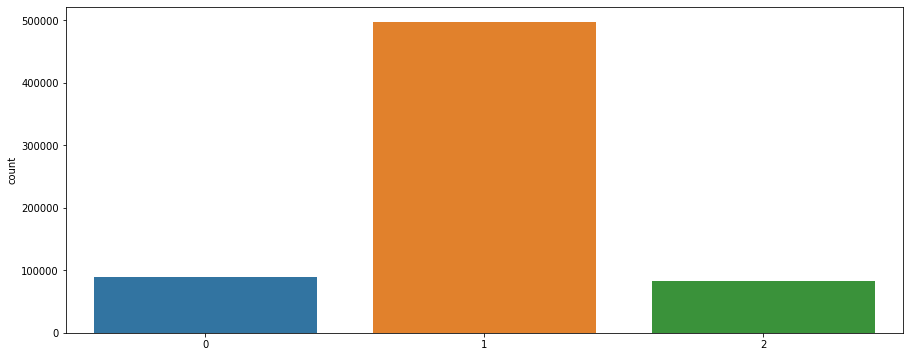

In [18]:
plt.figure(figsize = (15, 6))
sns.countplot(x=labels);

In [19]:
classifier_model = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer='char')),
                ('bernoulliNB',BernoulliNB()),
])

In [20]:
vectorizer=TfidfVectorizer(analyzer='char',ngram_range=(1,2))
vectorized=vectorizer.fit_transform(features)
all_ngrams = vectorizer.get_feature_names()
# display top min(50,len(all_ngrams) of the most frequent words
num_ngrams = min(50, len(all_ngrams))

# count the number of words in the total corpse
all_counts = vectorized.sum(axis=0).tolist()[0]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.20,random_state=0)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [22]:
# from sklearn.model_selection import GridSearchCV


# alpha=[float(x) for x in np.linspace(start=0.01,stop=0.1,num=100)]

# # Create the random grid
# param_grid = {'alpha': alpha}



# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1': make_scorer(f1_score, average = 'macro')}

# nb=BernoulliNB()

# grid_search_nb = GridSearchCV(nb, param_grid = param_grid, scoring = scoring, refit='f1',verbose=3,n_jobs=-1)
# grid_search_nb.fit(X_train, y_train)
# grid_search_nb.best_estimator_


In [23]:
# results=pd.DataFrame(grid_search_nb.cv_results_)
# results=results[results.mean_test_f1!=np.nan]
# print(results.shape)
# results.loc[results['params']=={'alpha': 0.017272727272727273}]

In [24]:
# f1trains=[]
# for i in range(100):
#   nb_temp=BernoulliNB(alpha=results['params'][i]['alpha'])
#   nb_temp.fit(X_train,y_train)
#   y_pred_train=nb_temp.predict(X_train)
#   f1trains.append(f1_score(y_train, y_pred_train, average='macro'))

# fig, ax = plt.subplots();
# plt.figure(figsize=(12, 10));
# sns.lineplot(x=[i for i in range(100)],y=[f1trains[i] for i in range(100)],ax=ax);
# sns.lineplot(x=[i for i in range(100)],y=[results['mean_test_f1'][i] for i in range(100)],ax=ax,color='r');
# plt.show();

In [25]:
start_time = time.time()
nb=BernoulliNB(alpha=0.0172727)
print("Time Taken to train the model = %s seconds" % round((time.time() - start_time),2))
print()
print()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

Time Taken to train the model = 0.0 seconds


[[ 41062  29786    736]
 [ 23602 347537  25929]
 [    55  13777  53056]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60     71584
           1       0.89      0.88      0.88    397068
           2       0.67      0.79      0.72     66888

    accuracy                           0.82    535540
   macro avg       0.73      0.75      0.74    535540
weighted avg       0.83      0.82      0.82    535540

0.8246909661276468


In [26]:

y_pred = nb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[10199  7694   185]
 [ 6048 87028  6506]
 [   12  3375 12838]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59     18078
           1       0.89      0.87      0.88     99582
           2       0.66      0.79      0.72     16225

    accuracy                           0.82    133885
   macro avg       0.72      0.74      0.73    133885
weighted avg       0.82      0.82      0.82    133885

0.8220861186839452


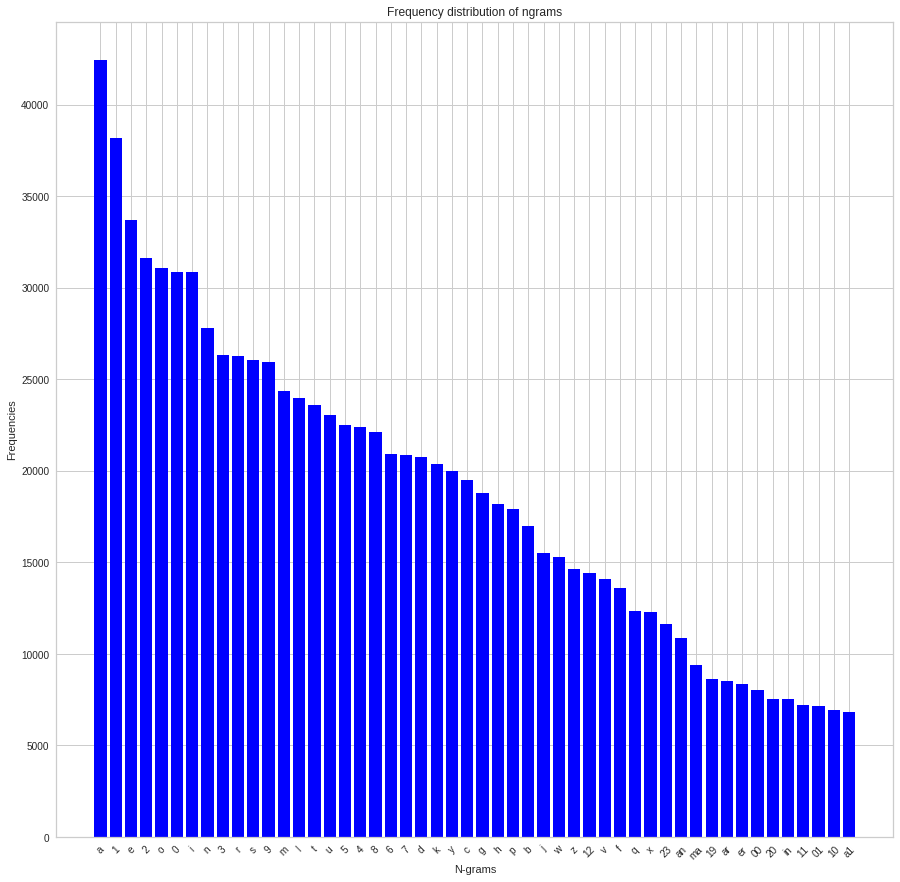

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(1,2))
vect_texts = vectorizer.fit_transform(features)
all_ngrams = vectorizer.get_feature_names()
# display top min(50,len(all_ngrams) of the most frequent words
num_ngrams = min(50, len(all_ngrams))

# count the number of words in the total corpse
all_counts = vect_texts.sum(axis=0).tolist()[0]

# loop the words(features) with counts using zip function
all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(15, 15))
plt.bar(idx, counts, width=0.8, color = "blue")
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

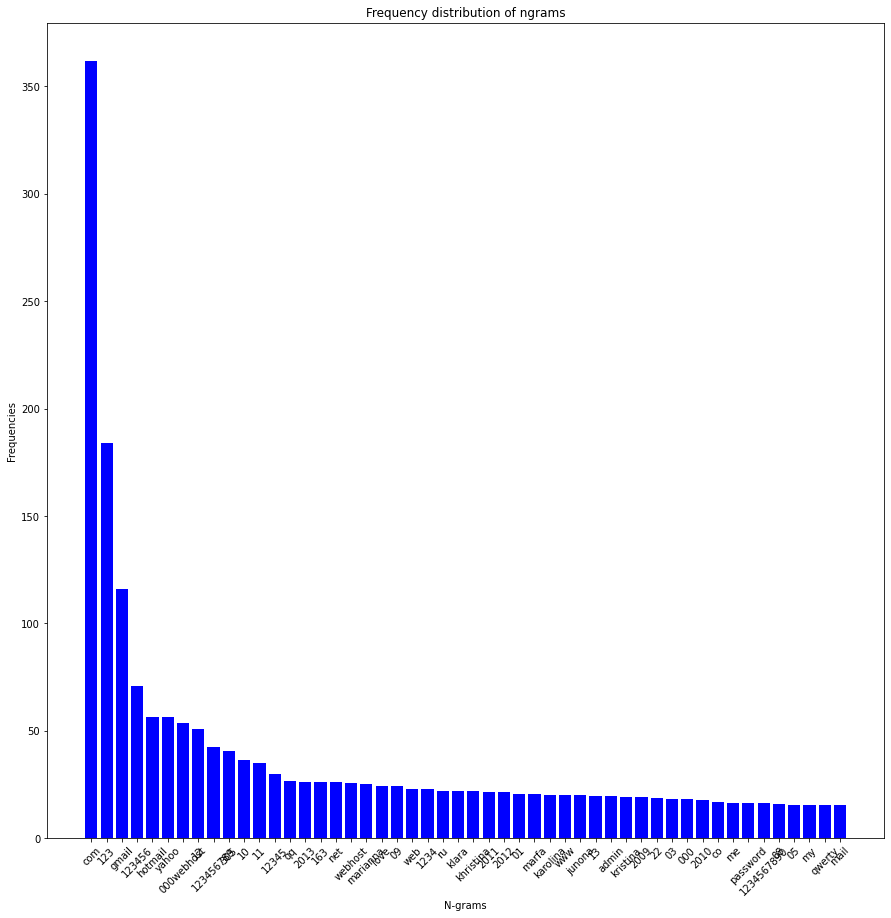

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vect_texts = vectorizer.fit_transform(features)
all_ngrams = vectorizer.get_feature_names()
# display top min(50,len(all_ngrams) of the most frequent words
num_ngrams = min(50, len(all_ngrams))

# count the number of words in the total corpse
all_counts = vect_texts.sum(axis=0).tolist()[0]

# loop the words(features) with counts using zip function
all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(15, 15))
plt.bar(idx, counts, width=0.8, color = "blue")
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

In [33]:
pip install wordcloud

In [53]:
len(all_ngrams)
#len(features)

4162

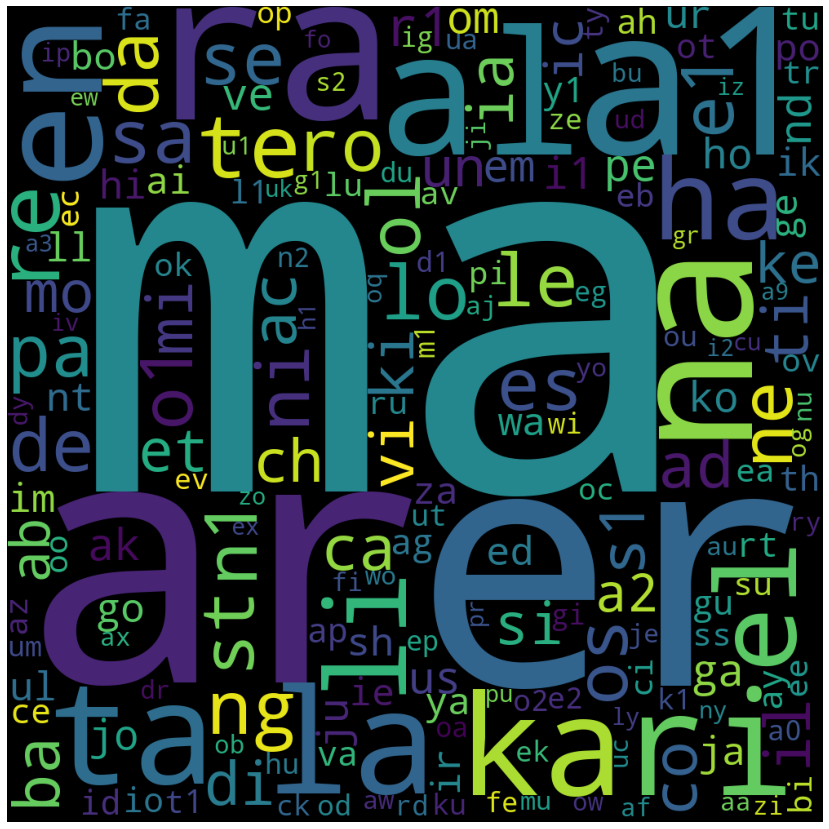

In [65]:
from wordcloud import WordCloud
text=''
for i in all_ngrams:
  text=text+i+' '
fig = plt.subplots(figsize=(15,15)) 
#Creating a basic word cloud
wordcloud = WordCloud(width=1000, height=1000).generate(text)
# plt.title('USA collective description of UFO', fontsize=27)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# # Saving the word cloud
# wordcloud.to_file('wordcloud_usa.png')


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
lr=LogisticRegression(multi_class='multinomial', solver='sag')
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


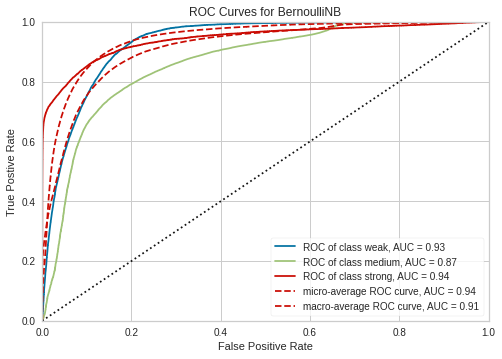

In [30]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(nb, X_train, y_train, X_test=X_test, y_test=y_test, classes=['weak', 'medium','strong']);

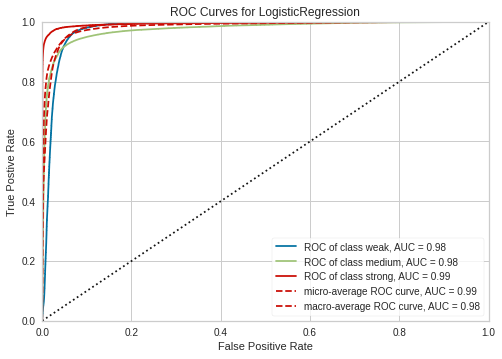

In [31]:
roc_auc(lr, X_train, y_train, X_test=X_test, y_test=y_test, classes=['weak', 'medium','strong']);

In [32]:
# dt=DecisionTreeClassifier()
# dt.fit(X_train,y_train)
# roc_auc(lr, X_train, y_train, X_test=X_test, y_test=y_test, classes=['weak', 'medium','strong']);